# Identification experiment
by Catarina Fernandes

Identification experiment:
- input (1):  M x M diagonally symmetric matrix of distances, 1 x M vector of labels (ground truth)
- output (2): C vector of ranks, CMC (vector plot)

In [1]:
import numpy as np 
from sklearn import metrics
from matplotlib import pyplot as plt

In [125]:
class IdentificationExperiment():
    
    def __init__(self, distances_matrix, ground_truth):
        if distances_matrix.shape[0] != distances_matrix.shape[1]:
            raise ValueError(f"The Distances Matrix dimension should be M x M, instead it is {distances_matrix.shape[0]} x {distances_matrix.shape[1]}")
        
        if distances_matrix.shape[0] != len(ground_truth) or ground_truth.ndim != 1:
            raise ValueError(f"The Ground Truth Array should have 1 x {distances_matrix.shape[0]} dimension, instead it has {ground_truth.ndim} x {len(ground_truth)}.")

        if not ((0 <= distances_matrix) & (distances_matrix <= 1)).all():
            raise ValueError("The values in the Distances Matrix should be between 0 and 1.")

        if not np.allclose(distances_matrix, distances_matrix.T):
            raise ValueError("The Distances Matrix should be symetric.")
        
        self.distances_matrix = distances_matrix
        self.ground_truth = ground_truth


    def compute(self):
        results_matrix = np.array(self.get_identification_results())
        intermediate_vector_of_ranks = np.mean(results_matrix, axis=0)
        c_vector_of_ranks = np.cumsum(intermediate_vector_of_ranks)
        rank_list = [1,2,3,5,10,15,20]

        self.plot_cmc(c_vector_of_ranks[:20], rank_list)

        return c_vector_of_ranks

    def plot_cmc(self, c_vector_of_ranks, rank_list):
        plt.plot(c_vector_of_ranks, marker=".",color='orange', label='C vector of ranks')   
        plt.title('Cumulative Matching Characteristic')
        plt.xlabel('Ranks 1 to 20')
        plt.ylabel('Rank score')
        plt.legend(loc='lower right')
        plt.ylim(bottom=0)
        list_x_axis = list(range(1, len(c_vector_of_ranks)+1))
        rank_list_x_axis = ["R" + str(num) if num in rank_list else " " for num in list_x_axis]
        plt.xticks(np.arange(0, len(self.unique_classes), 1), rank_list_x_axis)
        plt.show()


    def get_identification_results(self):
        self.unique_classes = np.unique(self.ground_truth)
        identification_matrix = [] # Each row is a list of 1s and 0s, 1 if the class matches the ground truth, 0 otherwise

        for r_index, r_value in enumerate(self.distances_matrix):
            class_percentages = [] # Averages of each class in each row
            class_percentage = [] # Each class item in a certain row
            current_class = self.unique_classes[0] # Keeps track of the current class for the class averages calculation

            for c_index, c_value in enumerate(r_value):
                if current_class == self.ground_truth[c_index]: # Same class, continue average
                    if c_index != len(self.ground_truth)-1: # Not last column
                        if r_index != c_index: # If not comparing the same entry
                            class_percentage.append(self.distances_matrix[r_index][c_index])

                    else: # Last column
                        # Finalize row process
                        if r_index != c_index:
                            class_percentage.append(self.distances_matrix[r_index][c_index])

                        # Calculate average of last class
                        class_percentages.append((np.mean(np.array(class_percentage)), self.ground_truth[c_index]))

                        # Last cell of a certain row -> update current class to the first
                        current_class = self.unique_classes[0]

                else: # Different class, compute new average
                    if c_index != len(self.ground_truth)-1: # Not last column 
                        # Store average of previous class
                        class_percentages.append((np.mean(np.array(class_percentage)), self.ground_truth[c_index-1]))
                        
                        # Update current class
                        current_class = self.ground_truth[c_index] 

                        # Start average calculation of current class
                        class_percentage = []
                        if r_index != c_index:
                            class_percentage.append(self.distances_matrix[r_index][c_index])
                    # Last column doesn't matter if we have more than 1 entry of each class
                    # The first entry of a class would never be the last entry of a class

            # Sort class averages
            identification_results = sorted(class_percentages, reverse=True)

            # Replace tuple(average, class) by 0 and 1, 1 if the class matches the ground truth, 0 otherwise
            for i, item in enumerate(identification_results):
                if item[1] == self.ground_truth[r_index]:
                    identification_results[i] = 1
                else:
                    identification_results[i] = 0

            # Add list of 0 and 1s to identification matrix
            identification_matrix.append(identification_results)

        return identification_matrix
        
    @staticmethod
    def help(): 
        print("Identification Experiment Usage:\n Define IdentificationExperiment instance by creating a variable and assigning it to IdentificationExperiment(distance_matrix, ground_truth).\n   - Parameter distance_matrix should be a MxM array containing the distances between all M images. The values in the array should be between 0 and 1 and indicate the similarity between each image.\n   - Parameter ground_truth should be a 1xM array containing the classes of each image.\n\n After instancing a variable IdentificationExperiment var, the method compute(self) can be called simply by running \"var.compute()\" which will return the C vector of ranks and plot the CMC curve.")


In [126]:
IdentificationExperiment.help()

Identification Experiment Usage:
 Define IdentificationExperiment instance by creating a variable and assigning it to IdentificationExperiment(distance_matrix, ground_truth).
   - Parameter distance_matrix should be a MxM array containing the distances between all M images. The values in the array should be between 0 and 1 and indicate the similarity between each image.
   - Parameter ground_truth should be a 1xM array containing the classes of each image.

 After instancing a variable IdentificationExperiment var, the method compute(self) can be called simply by running "var.compute()" which will return the C vector of ranks and plot the CMC curve.


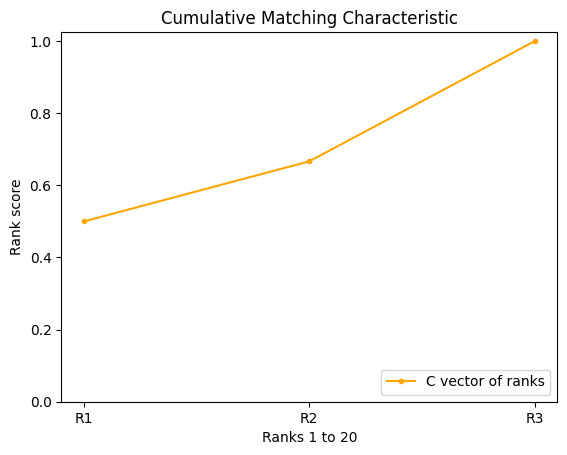

array([0.5       , 0.66666667, 1.        ])

In [119]:
distances_matrix = np.array([[1,0.9,0.3,0.1,0.2,0.1],[0.9,1,0.7,0.3,0.4,0.3],[0.3,0.7,1,0.1,0.8,0.1],[0.1,0.3,0.1,1,0.2,0.3],[0.2,0.4,0.8,0.2,1,0.4],[0.1,0.3,0.1,0.3,0.4,1]])
ground_truth = np.array(["A", "A", "B","B","C","C"])

#  A   A   B   B   C   C
#A 1   0.9 0.3 0.1 0.2 0.1
#A 0.9 1   0.7 0.3 0.4 0.3
#B 0.3 0.7 1   0.1 0.8 0.1
#B 0.1 0.3 0.1 1   0.2 0.3
#C 0.2 0.4 0.8 0.2 1   0.4
#C 0.1 0.3 0.1 0.3 0.4 1


# distances_matrix = generate_test_dist_matrix()
# ground_truth = np.array(["A","A","A", "A","B","B","B","B","C","C","C","C","D","D","D","D","E","E","E","E"])
# ground_truth = np.array(["A","A","B","B","C","C","D","D","E","E","F","F","G","G","H","H","I","I","J","J"])

test = IdentificationExperiment(distances_matrix, ground_truth)
test.compute()

### Auxiliar functions

In [113]:
def generate_test_dist_matrix():
    N = 20
    b = np.random.randint(0,100,size=(N,N))
    b_symm = (b + b.T)/2
    b_symm = b_symm / 100
    diag = np.full((1, 100), 1)

    for row_index, row in enumerate(b_symm):
        for col_index, col in enumerate(row):
            if row_index == col_index:
                b_symm[row_index][col_index] = 1
            else:
                b_symm[row_index][col_index] = col

    return b_symm